# CS516 Medical Imaging 

## Assignment 1

### Luyun Nie 002268087

###  Junjia Lin 002268506

## Set up :
### Import Packages and Data Processing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import numpy.fft as f

In [2]:
# Import and Decompressiong the NII Files
img_car_axial = nib.load("E:/medical imaging/assignment 1/modalities/cardiac_axial.nii.gz")
img_car_realt = nib.load("E:/medical imaging/assignment 1/modalities/cardiac_realtime.nii.gz")
img_ct = nib.load("E:/medical imaging/assignment 1/modalities/ct.nii.gz")
img_fmti = nib.load("E:/medical imaging/assignment 1/modalities/fmri.nii.gz")
img_meanp = nib.load("E:/medical imaging/assignment 1/modalities/meanpet.nii.gz")
img_swi = nib.load("E:/medical imaging/assignment 1/modalities/swi.nii.gz")
img_T1_t = nib.load("E:/medical imaging/assignment 1/modalities/T1_with_tumor.nii.gz")
img_tof = nib.load("E:/medical imaging/assignment 1/modalities/tof.nii.gz")

In [3]:
# Get the Data 
img_car_axial = img_car_axial.get_data()
img_car_realt = img_car_realt.get_data()
img_ct = img_ct.get_data()
img_fmti = img_fmti.get_data()
img_meanp = img_meanp.get_data()
img_swi = img_swi.get_data()
img_T1_t = img_T1_t.get_data()
img_tof = img_tof.get_data()

<ipython-input-3-279a32428647>:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  img_car_axial = img_car_axial.get_data()
<ipython-input-3-279a32428647>:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  img_car_realt = img_car_realt.get_data()
<ipython-input-3-279a32428647>:4: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

*

In [4]:
# Classify the 3D and 4D Images by the shape respectively
img_car_axial.shape,img_car_realt.shape,img_ct.shape,img_fmti.shape,img_meanp.shape,\
img_swi.shape,img_T1_t.shape,img_tof.shape

((288, 288, 4, 30),
 (160, 160, 1, 500),
 (512, 512, 239),
 (160, 160, 36, 153),
 (256, 256, 207),
 (512, 512, 500),
 (160, 256, 256),
 (480, 640, 150))

Note: 
From the shape data above, we figured out the cardiac_axial, the cardiac_realtime and the fmti images are 4D, otherwise are 3D images.
Baced on the concept of slicing image, we decided to pick up the first volumn to display the 4D images.

In [5]:
# Slice the 4-D images by the first volumn
img_car_axial_vol0 = img_car_axial[:,:,:,0]
img_car_realt_vol0 = img_car_realt[:,:,:,0]
img_fmti_vol0 = img_fmti[:,:,:,0]

In [6]:
# Define the lists of images and titles for furthur use
imglist = [img_car_axial_vol0,img_car_realt_vol0,img_ct,img_fmti_vol0,
           img_meanp,img_swi,img_T1_t,img_tof]
imglist_t = [img_car_axial,img_car_realt,img_ct,img_fmti,
           img_meanp,img_swi,img_T1_t,img_tof]
imgtitle = ["cardiac_axial","cardiac_realtime","ct","fmri","meanpet","swi",
            "T1_with_tumor","tof"]

Note: The imagelist lists all 3D images and the imglist_t lists all original images

## Part1:
### Plot These Images

Text(0.5, 0.98, 'Jet Images')

<Figure size 432x288 with 0 Axes>

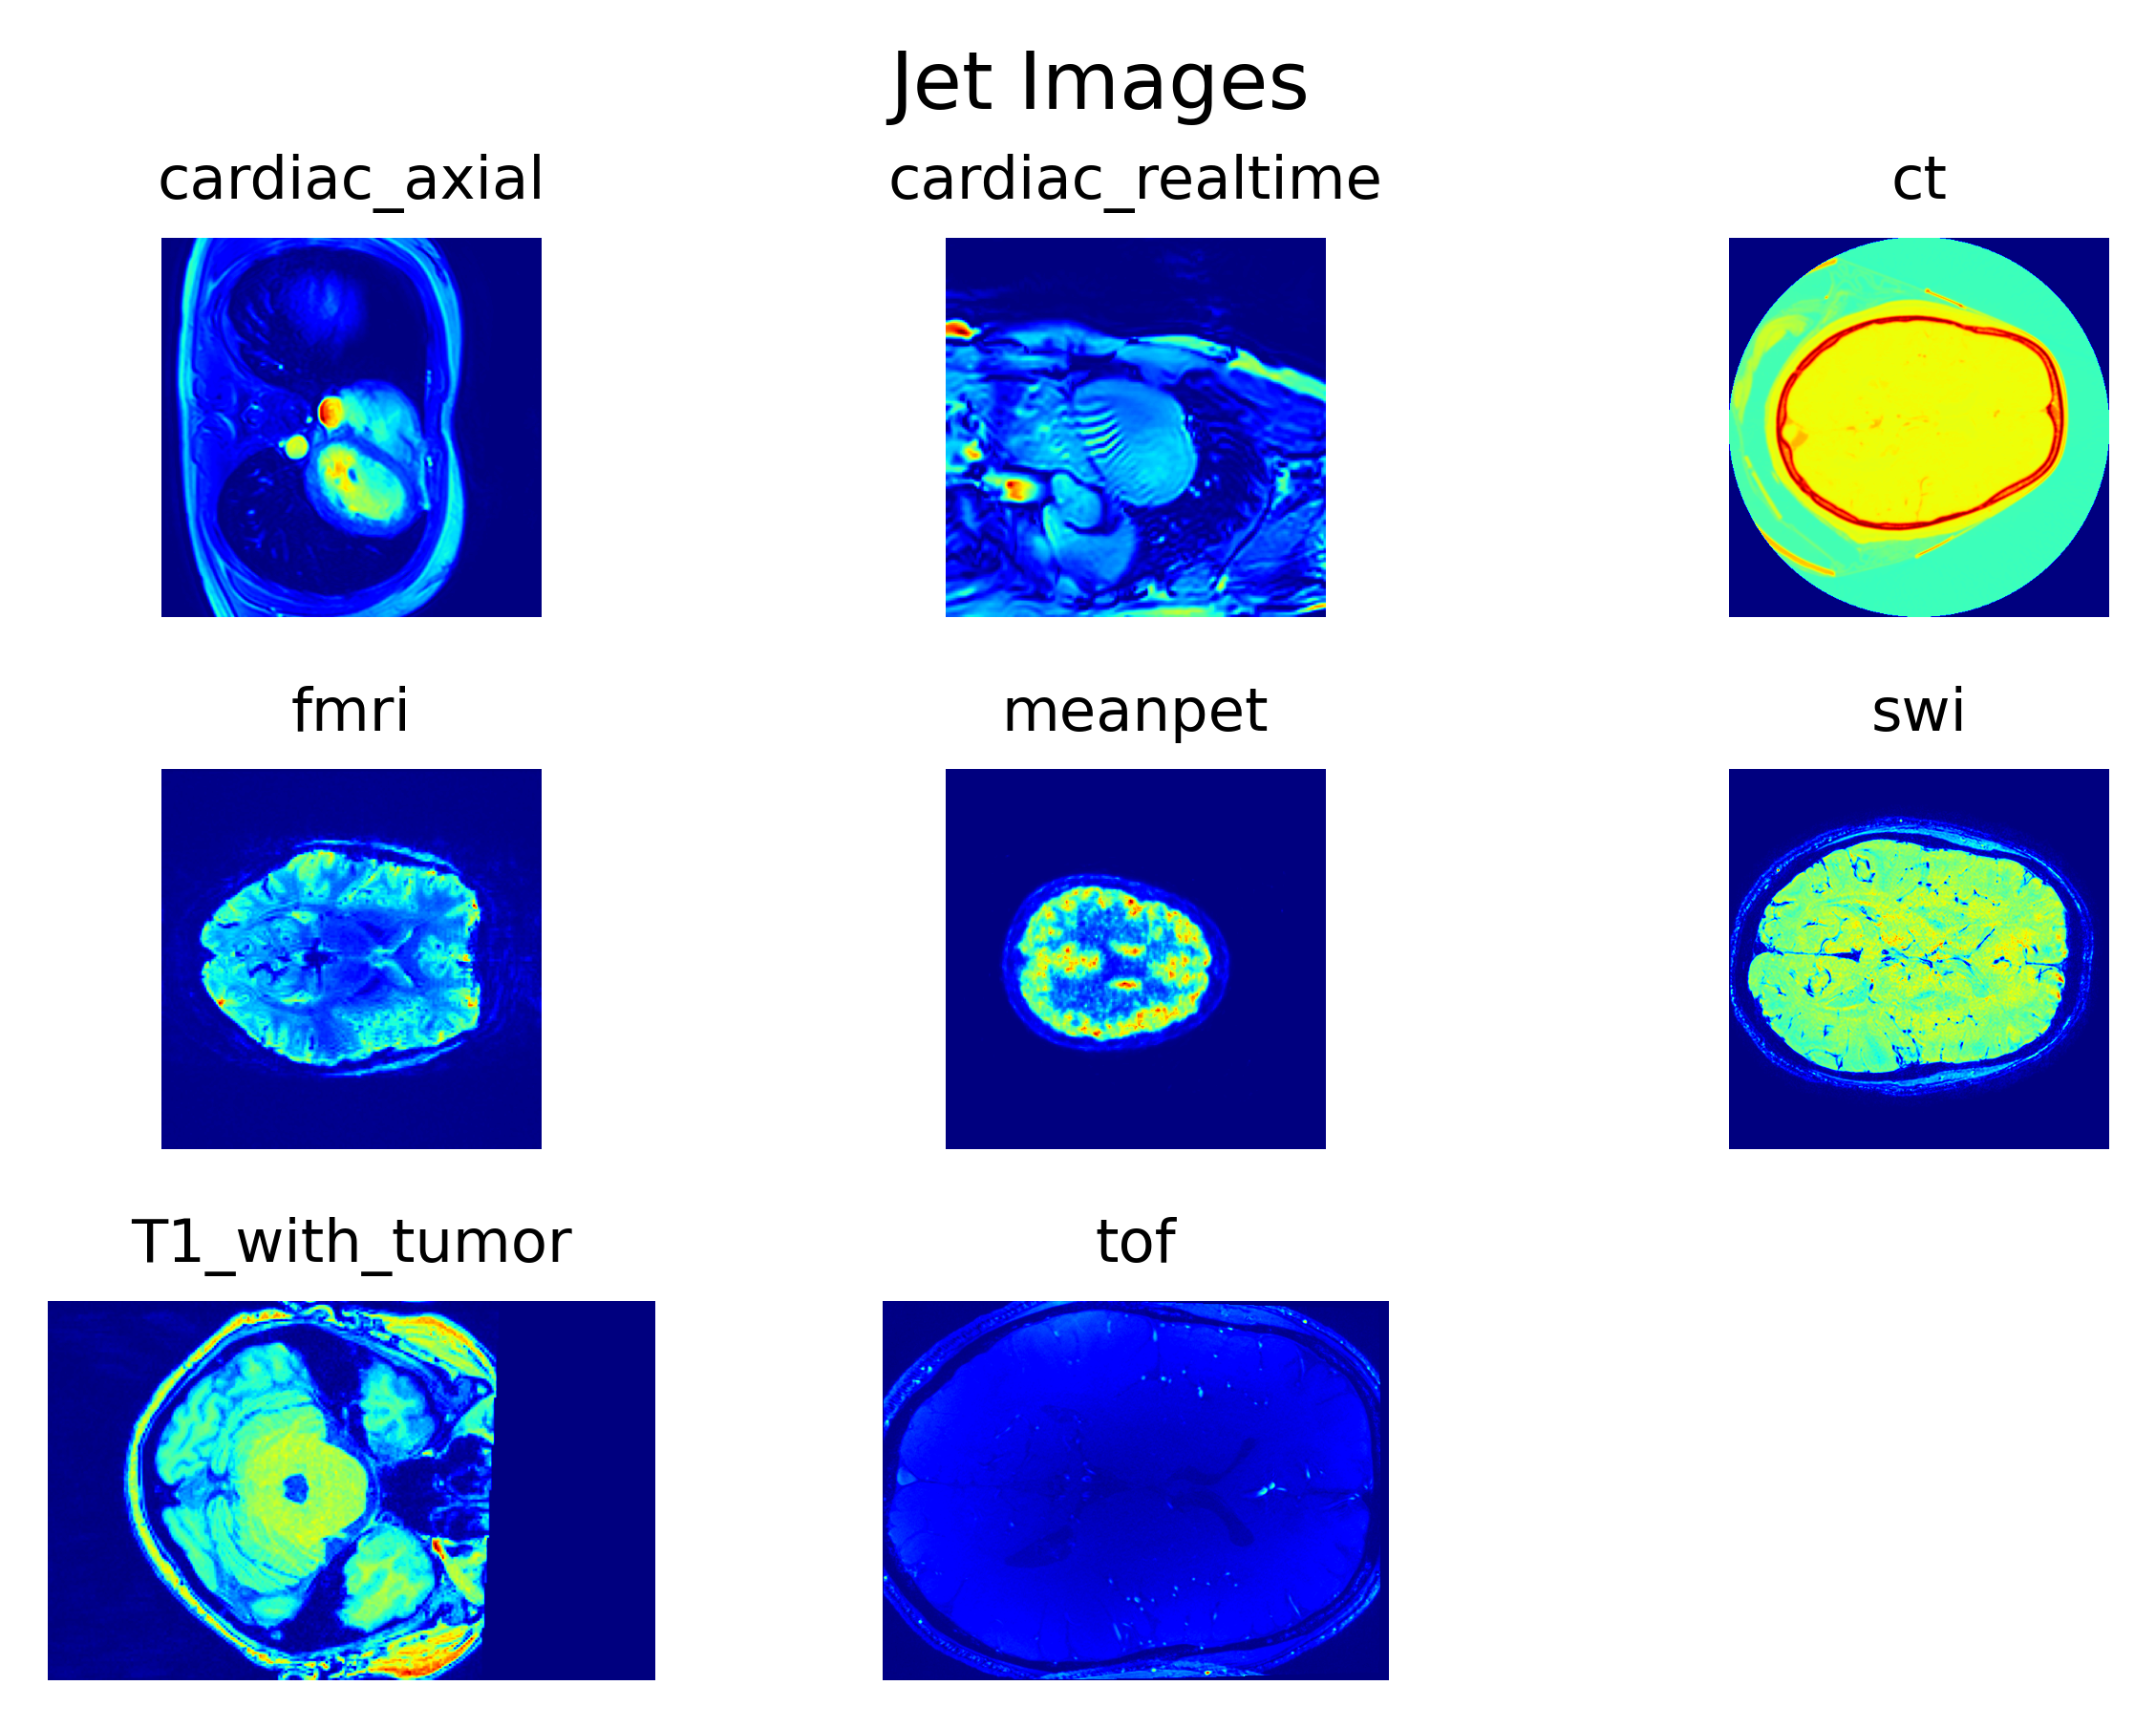

In [7]:
plt.figure()
plt.figure(dpi=500)
for i in range(8):
    plt.subplot(3,3,i+1)
    plt.axis('off')
    plt.title(imgtitle[i],fontsize=9)
    plt.imshow(imglist[i][:,:,int(imglist[i].shape[2]/2)], cmap='jet')
plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.suptitle("Jet Images") 

Note: According to the requirement, we set the z axis by the middle of the z shape.We interestly find that if we didn't set up the "dpi", we would get a really vague result.

### The MIP and The MIP for TOP

Text(0.5, 0.98, 'MIPs')

<Figure size 432x288 with 0 Axes>

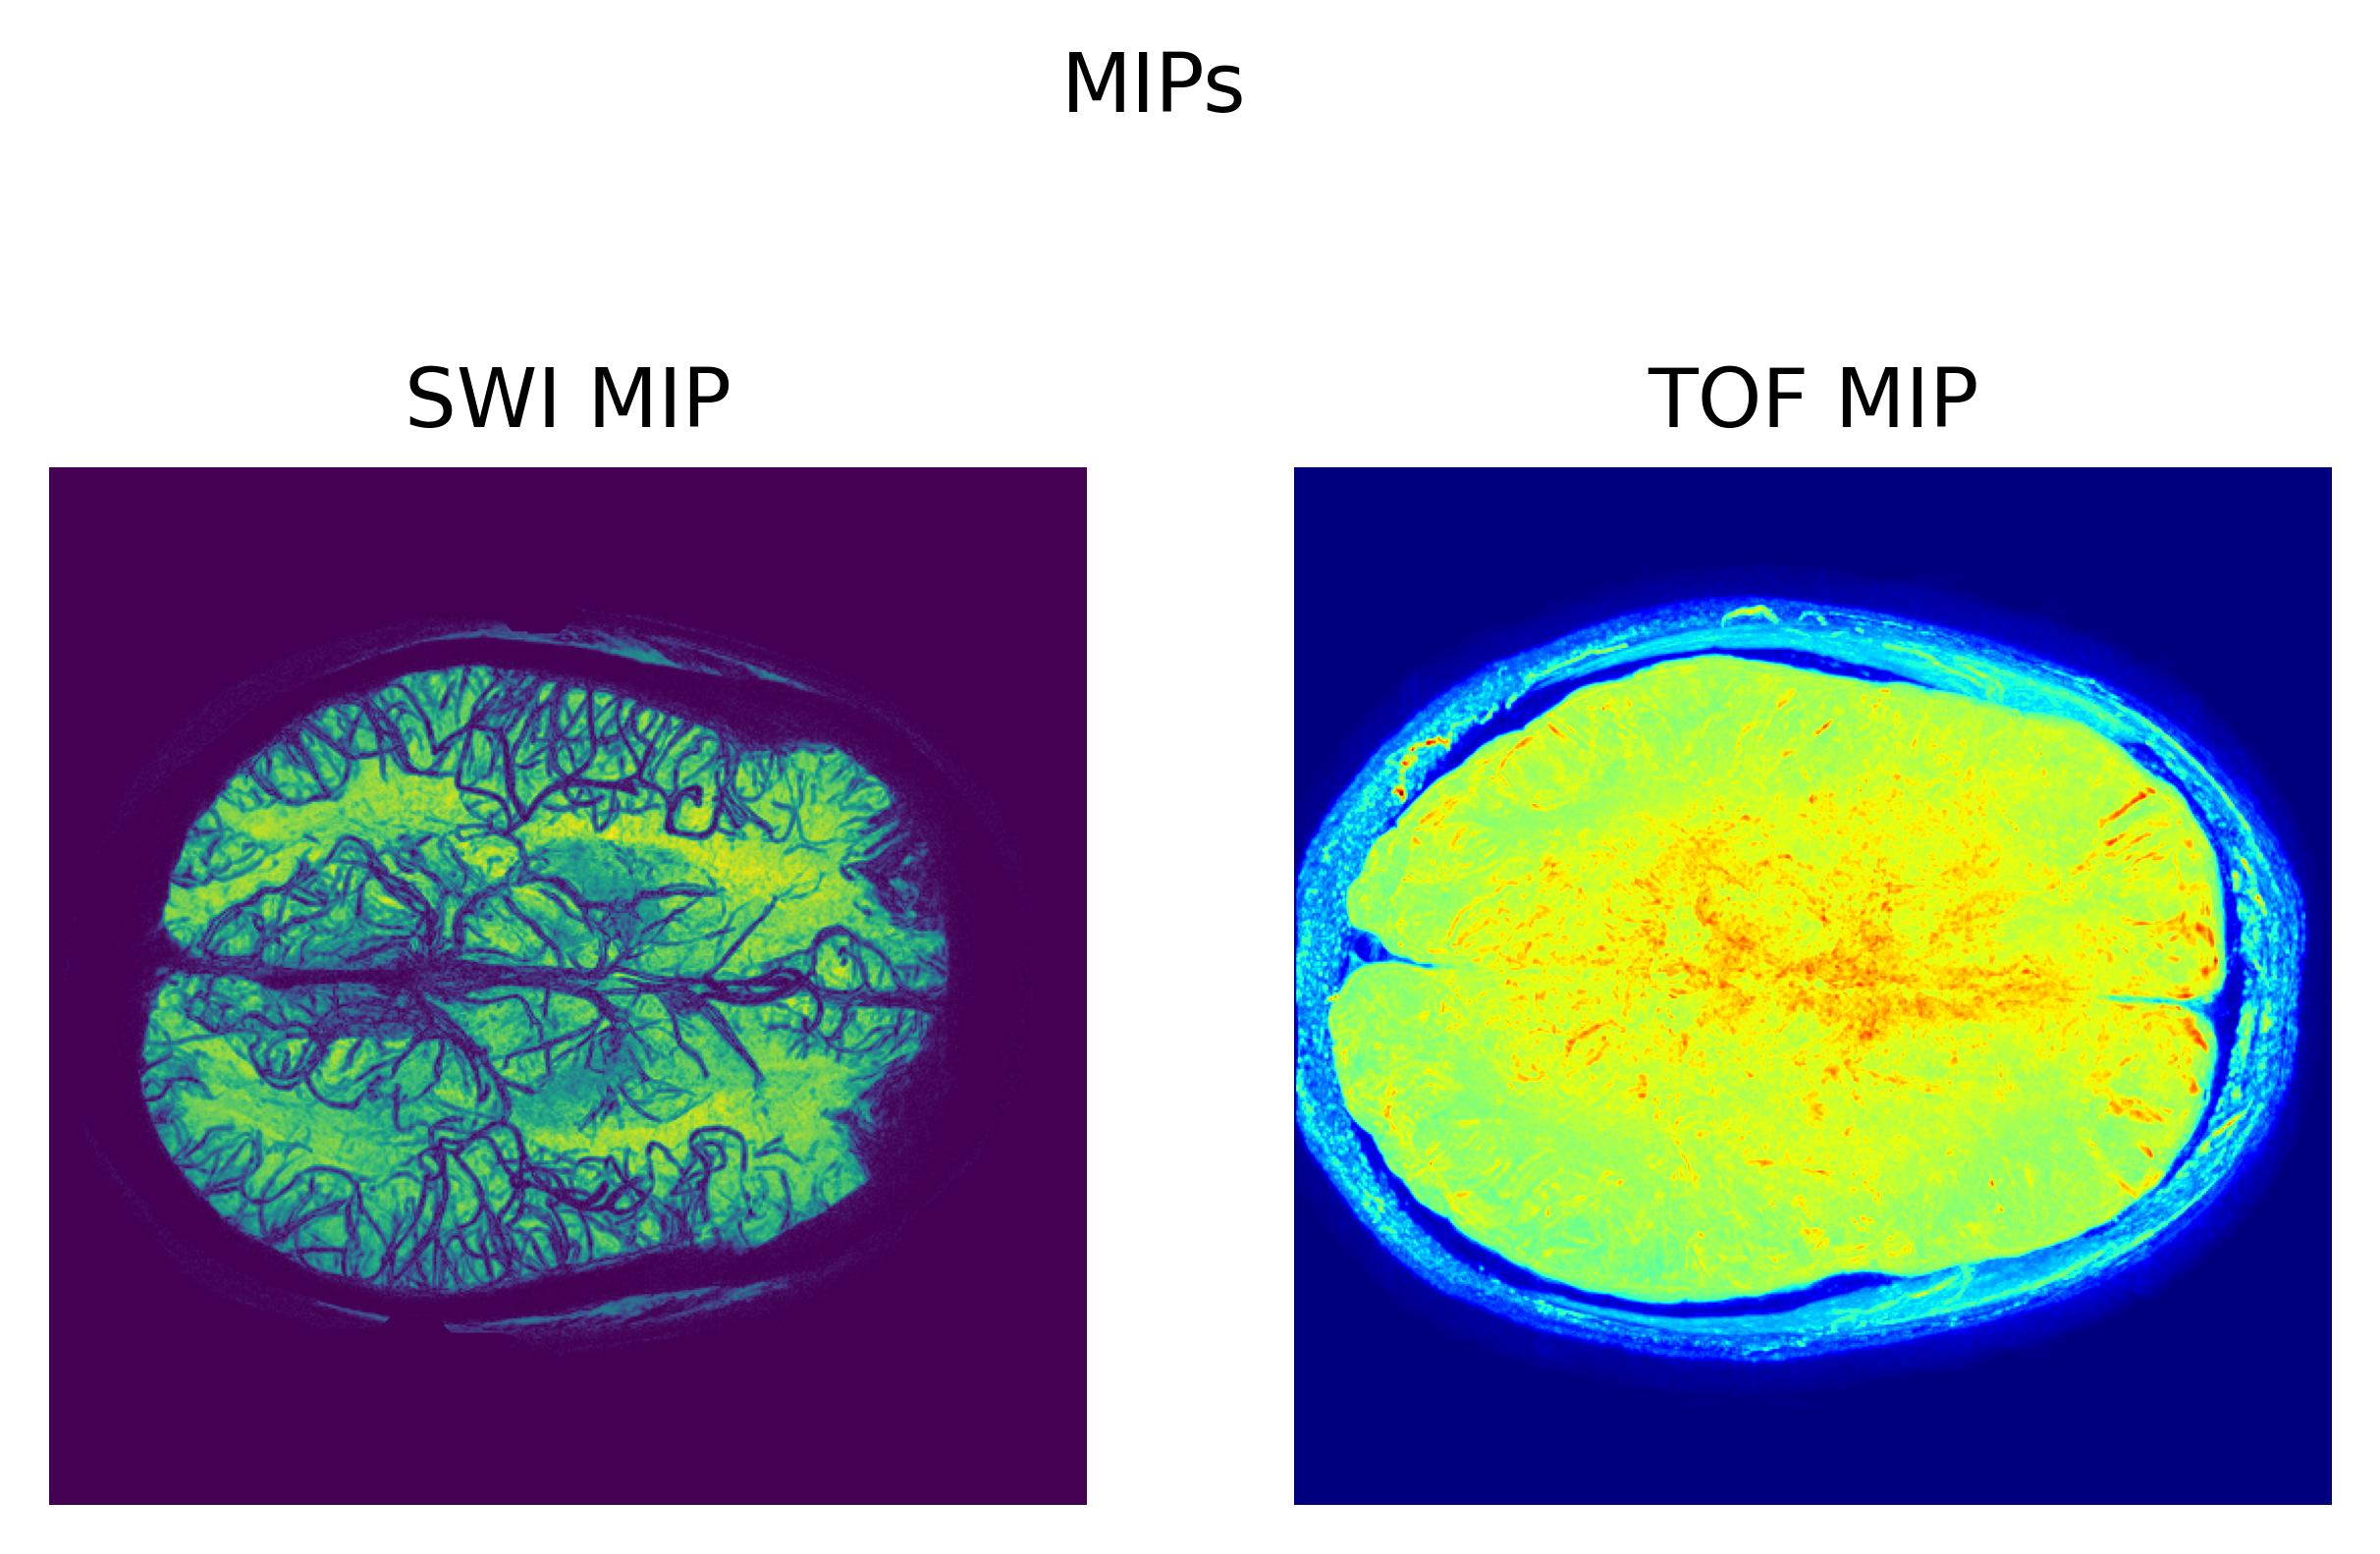

In [8]:
#MIP for the swi
plt.figure()
plt.figure(dpi=500)
img_swi_min = np.min(img_swi[:,:,200:300],axis=2)
plt.subplot(1,2,1)
plt.axis('off')
plt.title('SWI MIP')
plt.imshow(img_swi_min)

#MIP for the TOP
img_swi_max = np.max(img_swi[:,:,200:300],axis=2)                        
plt.subplot(1,2,2)
plt.axis('off')
plt.title('TOF MIP')
plt.imshow(img_swi_max,cmap='jet')
plt.suptitle("MIPs") 

Note: After several times trying, the 200:300 z axis range is most suitable for presenting a clear view for the swi MIP.However, no matter how small or large range of trying, we still cannot get a clear blood vessel of MIP for TOP figure as it in the example.

## Part 2: Contrast Estimation
### Michelson

In [9]:
def findMichelson(imglist):
    michelsonlist = []
    for i in range(8):
        if np.min(imglist[i])>0:
            imgmin = np.min(imglist[i])
        else:
            imgmin = 0
        imgmax = np.max(imglist[i])
        Cmichelson = round((imgmax-imgmin)/(imgmax+imgmin),1)
        michelsonlist.append(Cmichelson)
    return michelsonlist
Cmichelson = findMichelson(imglist_t)

In [10]:
Cmichelson

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [11]:
np.min(img_ct)

-3024.0

Note: When we firstly tried to calculate the Michelson contrast, we surprisingly found that the min value of ct is negative which is obviously smaller than the lower limit of the Michelson contrast method. In order to solve this problem, we introduce a "if" function to convert the negative value into positive.

### RMS

In [12]:
def findRMS(imglist):
    RMSlist = []
    for i in range(8):
        RMS = round(np.sqrt(np.mean((imglist[i]-np.mean(imglist[i]))**2)),1)
        RMSlist.append(RMS)
    return RMSlist
Crms= findRMS(imglist_t)

In [13]:
Crms

[2177.1, 21412.6, 1181.4, 265.9, 3679.9, 29.7, 122.7, 41.1]

Note: To be honest, we had deeply stucked into self doublt by the big difference values from the Michelson contrast. As results shown above, the cardiac_axial_realtime has the largest RMS contrast, while the swi is the lowest.

### Entropy

In [14]:
def findEntropy(imglist):
    entropylist = []
    for i in range(8):
        imghist = np.histogram(imglist[i])
        imgfrq = imghist[0][np.nonzero(imghist[0])]
        imgpro = [float(h)/sum(imgfrq) for h in imgfrq]
        entropy = round(np.abs(np.sum(np.multiply(imgpro, np.log2(imgpro)))),1)
        entropylist.append(entropy)
    return entropylist
Centropy = findEntropy(imglist_t)

In [15]:
Centropy

[1.5, 0.8, 2.0, 1.4, 0.4, 1.5, 1.2, 0.5]

Note: Actually we spent a long time on calculating the entropy contrast. The reason is that we easily get the image frequency but still don't know the way of flatened the figure.Although after searching the internet, we finally get the right way of calculating the entropy contrast, we still want to know the entropy mathmatics concept.

### Plot the Contrasts

Text(0.5, 0.98, 'Modalities with Contrasts')

<Figure size 432x288 with 0 Axes>

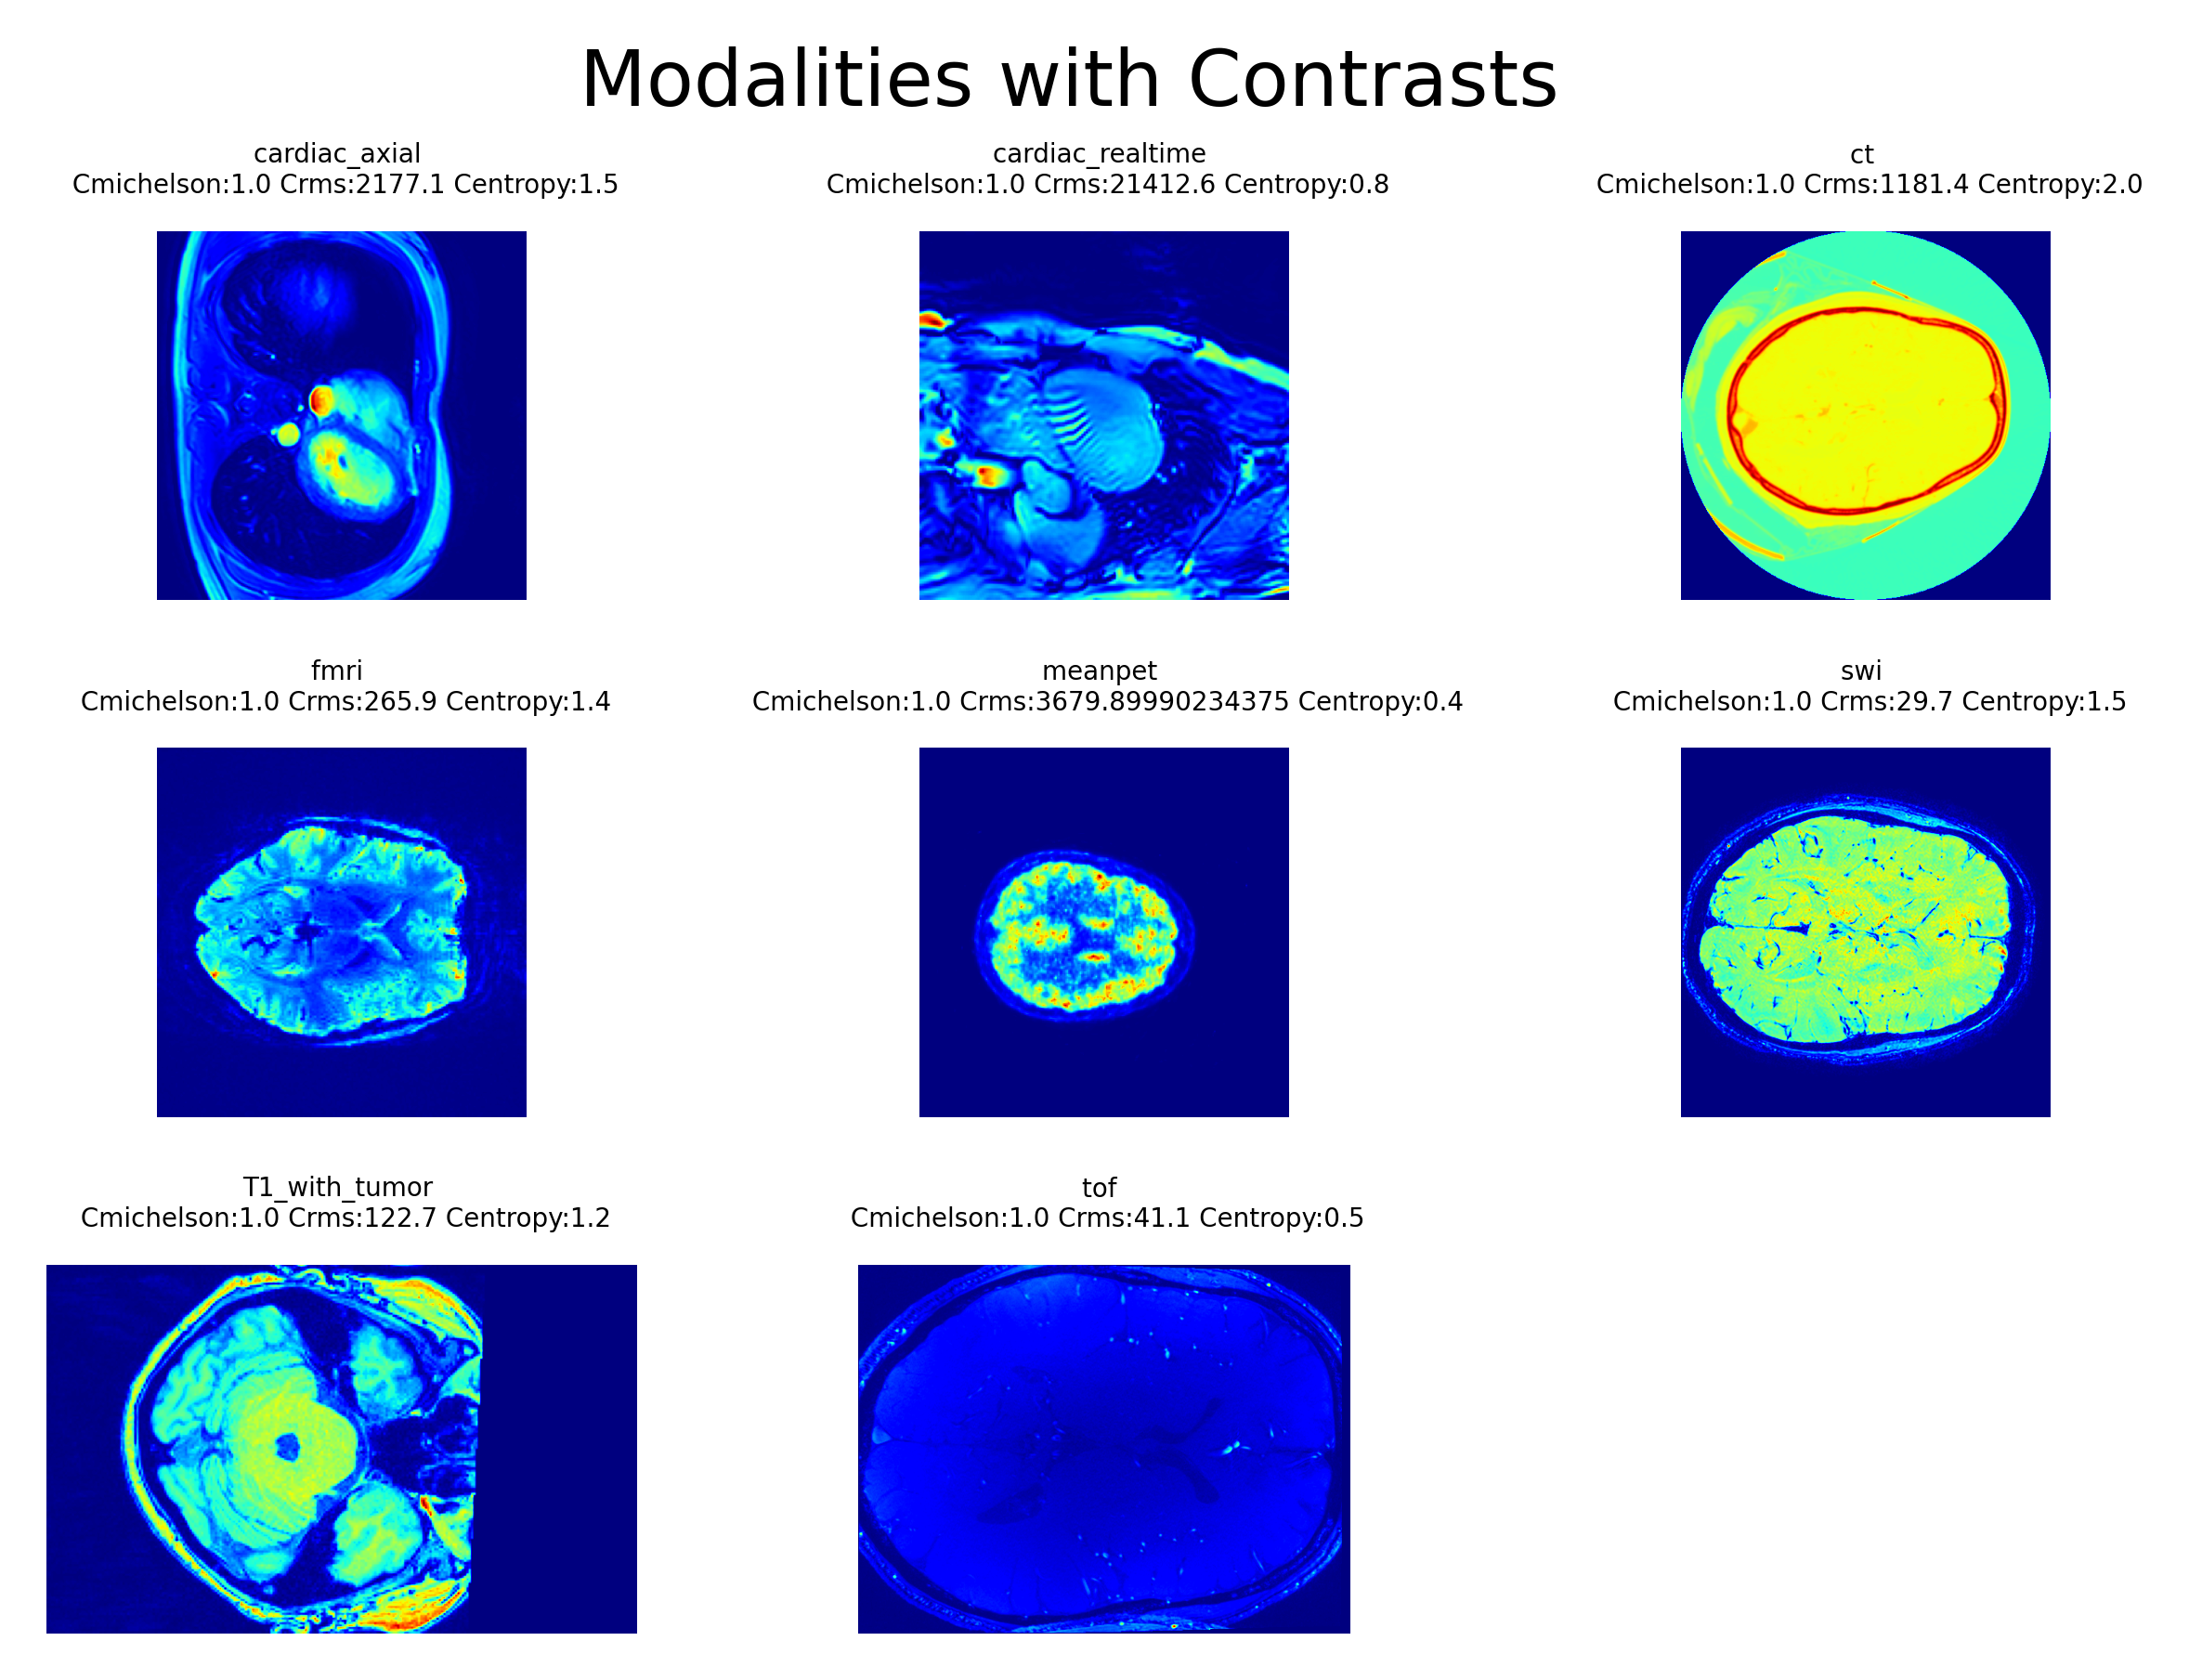

In [16]:
#Plot motalities with contrast
plt.figure()
plt.figure(dpi=500)
for i in range(8):
    plt.subplot(3,3,i+1)
    plt.axis('off')
    plt.title("{} \n Cmichelson:{} Crms:{} Centropy:{}".format\
              (imgtitle[i],Cmichelson[i],Crms[i],Centropy[i]),fontsize=4)
    plt.imshow(imglist[i][:,:,int(imglist[i].shape[2]/2)], cmap='jet')
plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.suptitle("Modalities with Contrasts")

Note: There is a really weird thing happened that the "Crms" value in the title is not rounded while seperatly printed, it is rounded.We don't know why this issue happened.

## Part 3: SNR Estimation, Quantifying Noise
### Noise Patches

In [17]:
#SNR: We have to find and test some none zero noise patches, so in this 
#question, we didn't apply a "for" function to get all resaults.
img_car_axial_snr = np.mean(img_car_axial)\
    /np.std(img_car_axial_vol0[260:280,260:280,2])
img_car_realt_snr = np.mean(img_car_realt)\
    /np.std(img_car_realt_vol0[0:20,130:150,0])
img_ct_scr = np.mean(img_ct)/np.std(img_ct[60:80,60:80,119])
img_fmti_scr = np.mean(img_fmti)/np.std(img_fmti_vol0[0:20,0:20,18])
img_meanp_scr = np.mean(img_meanp)/np.std(img_meanp[40:60,40:60,103])
img_swi_scr = np.mean(img_swi)/np.std(img_swi[80:100,80:100,249])
img_T1_t_scr = np.mean(img_T1_t)/np.std(img_T1_t[0:20,0:20,127])
img_tof_scr = np.mean(img_tof)/np.std(img_tof[0:20,0:20,124])
SNRlist = [img_car_axial_snr,img_car_realt_snr,img_ct_scr,\
      img_fmti_scr,img_meanp_scr,img_swi_scr,img_T1_t_scr,img_tof_scr]
SNRlist = [np.abs(round(i,1)) for i in SNRlist]

In [18]:
for i in range(8):
    print("{}:{}".format(imgtitle[i],SNRlist[i]))

cardiac_axial:222.2
cardiac_realtime:55.2
ct:1.4
fmri:39.1
meanpet:11.899999618530273
swi:15.5
T1_with_tumor:18.1
tof:25.6


Note: As shown on the printed result, the CT has the lowest contrast while the 
cardiac_axial is the highest.

Text(0.5, 0.98, 'Noise Histogram')

<Figure size 432x288 with 0 Axes>

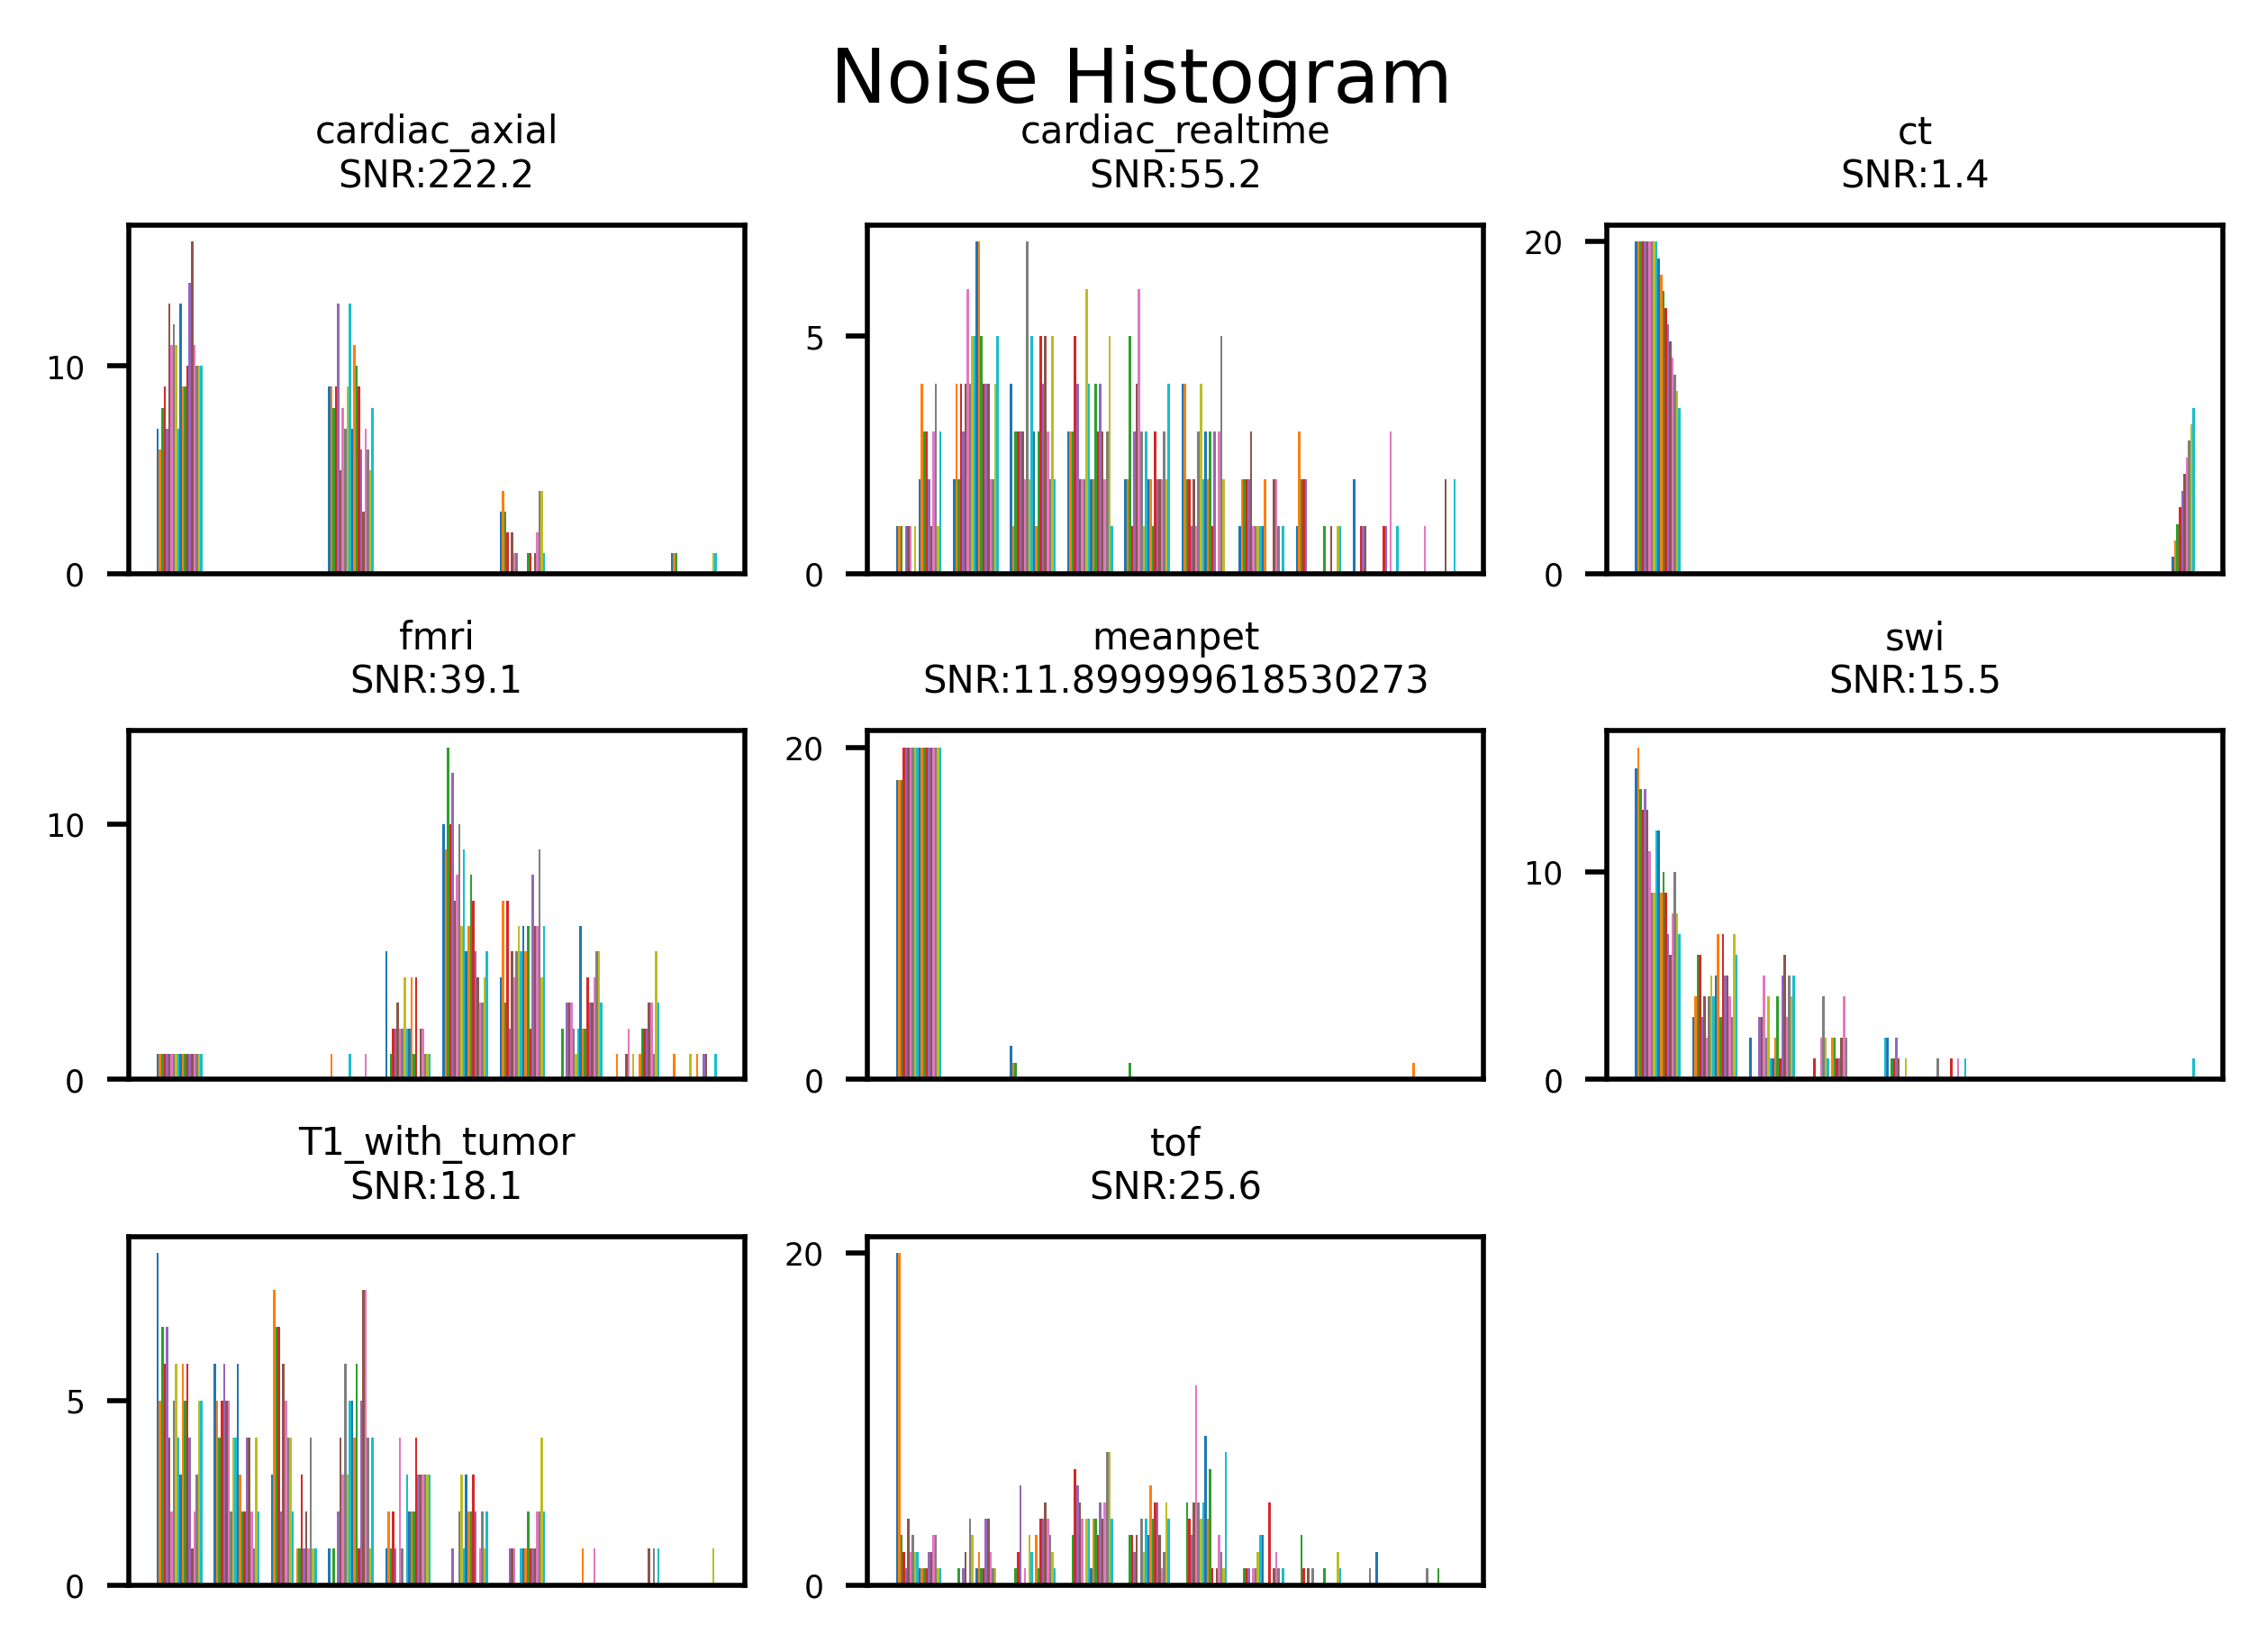

In [19]:
#Plot the noise histogram with SNRs
positionlist = [img_car_axial_vol0[260:280,260:280,2],
                img_car_realt_vol0[0:20,130:150,0],
                img_ct[60:80,60:80,119],
                img_fmti_vol0[0:20,0:20,18],
                img_meanp[40:60,40:60,103],
                img_swi[80:100,80:100,249],
                img_T1_t[0:20,0:20,127],
                img_tof[0:20,0:20,124]]
plt.figure()
plt.figure(dpi=500)
for i in range(8):
    plt.subplot(3,3,i+1)
    plt.title("{}\nSNR:{}".format(imgtitle[i],SNRlist[i]),fontsize=6)
    plt.xticks([])
    plt.yticks(fontsize=5)
    plt.hist(positionlist[i])
plt.subplots_adjust(wspace=0.2, hspace=0.45)
plt.suptitle("Noise Histogram")

Note: the same problem occured that the meanpet SNR cannot be rounded.

## Part 4: Linear Filtering
### Gaussfilt Function

In [20]:
def getgaussfilt(img,sigma):
    img_freqs = f.fftshift(f.fftn(img))
    [X,Y,Z] = np.mgrid[0:img.shape[0],0:img.shape[1],0:img.shape[2]]
    xpr,ypr,zpr = X-(img.shape[0])//2,Y-(img.shape[1])//2,Z-(img.shape[2])//2
    gaussfilt = np.exp(-((xpr**2+ypr**2+zpr**2)/(2*sigma**2)))/(2*np.pi*sigma**2)
    gaussfilt = gaussfilt/np.max(gaussfilt)
    filtered_freqs = img_freqs*gaussfilt
    filtered = np.abs(f.ifftn(f.fftshift(filtered_freqs)))
    return filtered

### Gaussfilt Plot

In [21]:
def plotgaussfilter(imglist,imgtitle,sigma):
    plt.figure(dpi=500)
    for i in range(8):
        plt.subplot(3,3,i+1)
        plt.axis('off')
        plt.title(imgtitle[i],fontsize=9)
        plt.imshow(getgaussfilt(imglist[i], sigma)[:,:,int(imglist[i].shape[2]/2)])
    plt.subplots_adjust(wspace=0.2, hspace=0.4)
    plt.suptitle("GaussFilter, Sigma:{number}".format(number = sigma))

<Figure size 432x288 with 0 Axes>

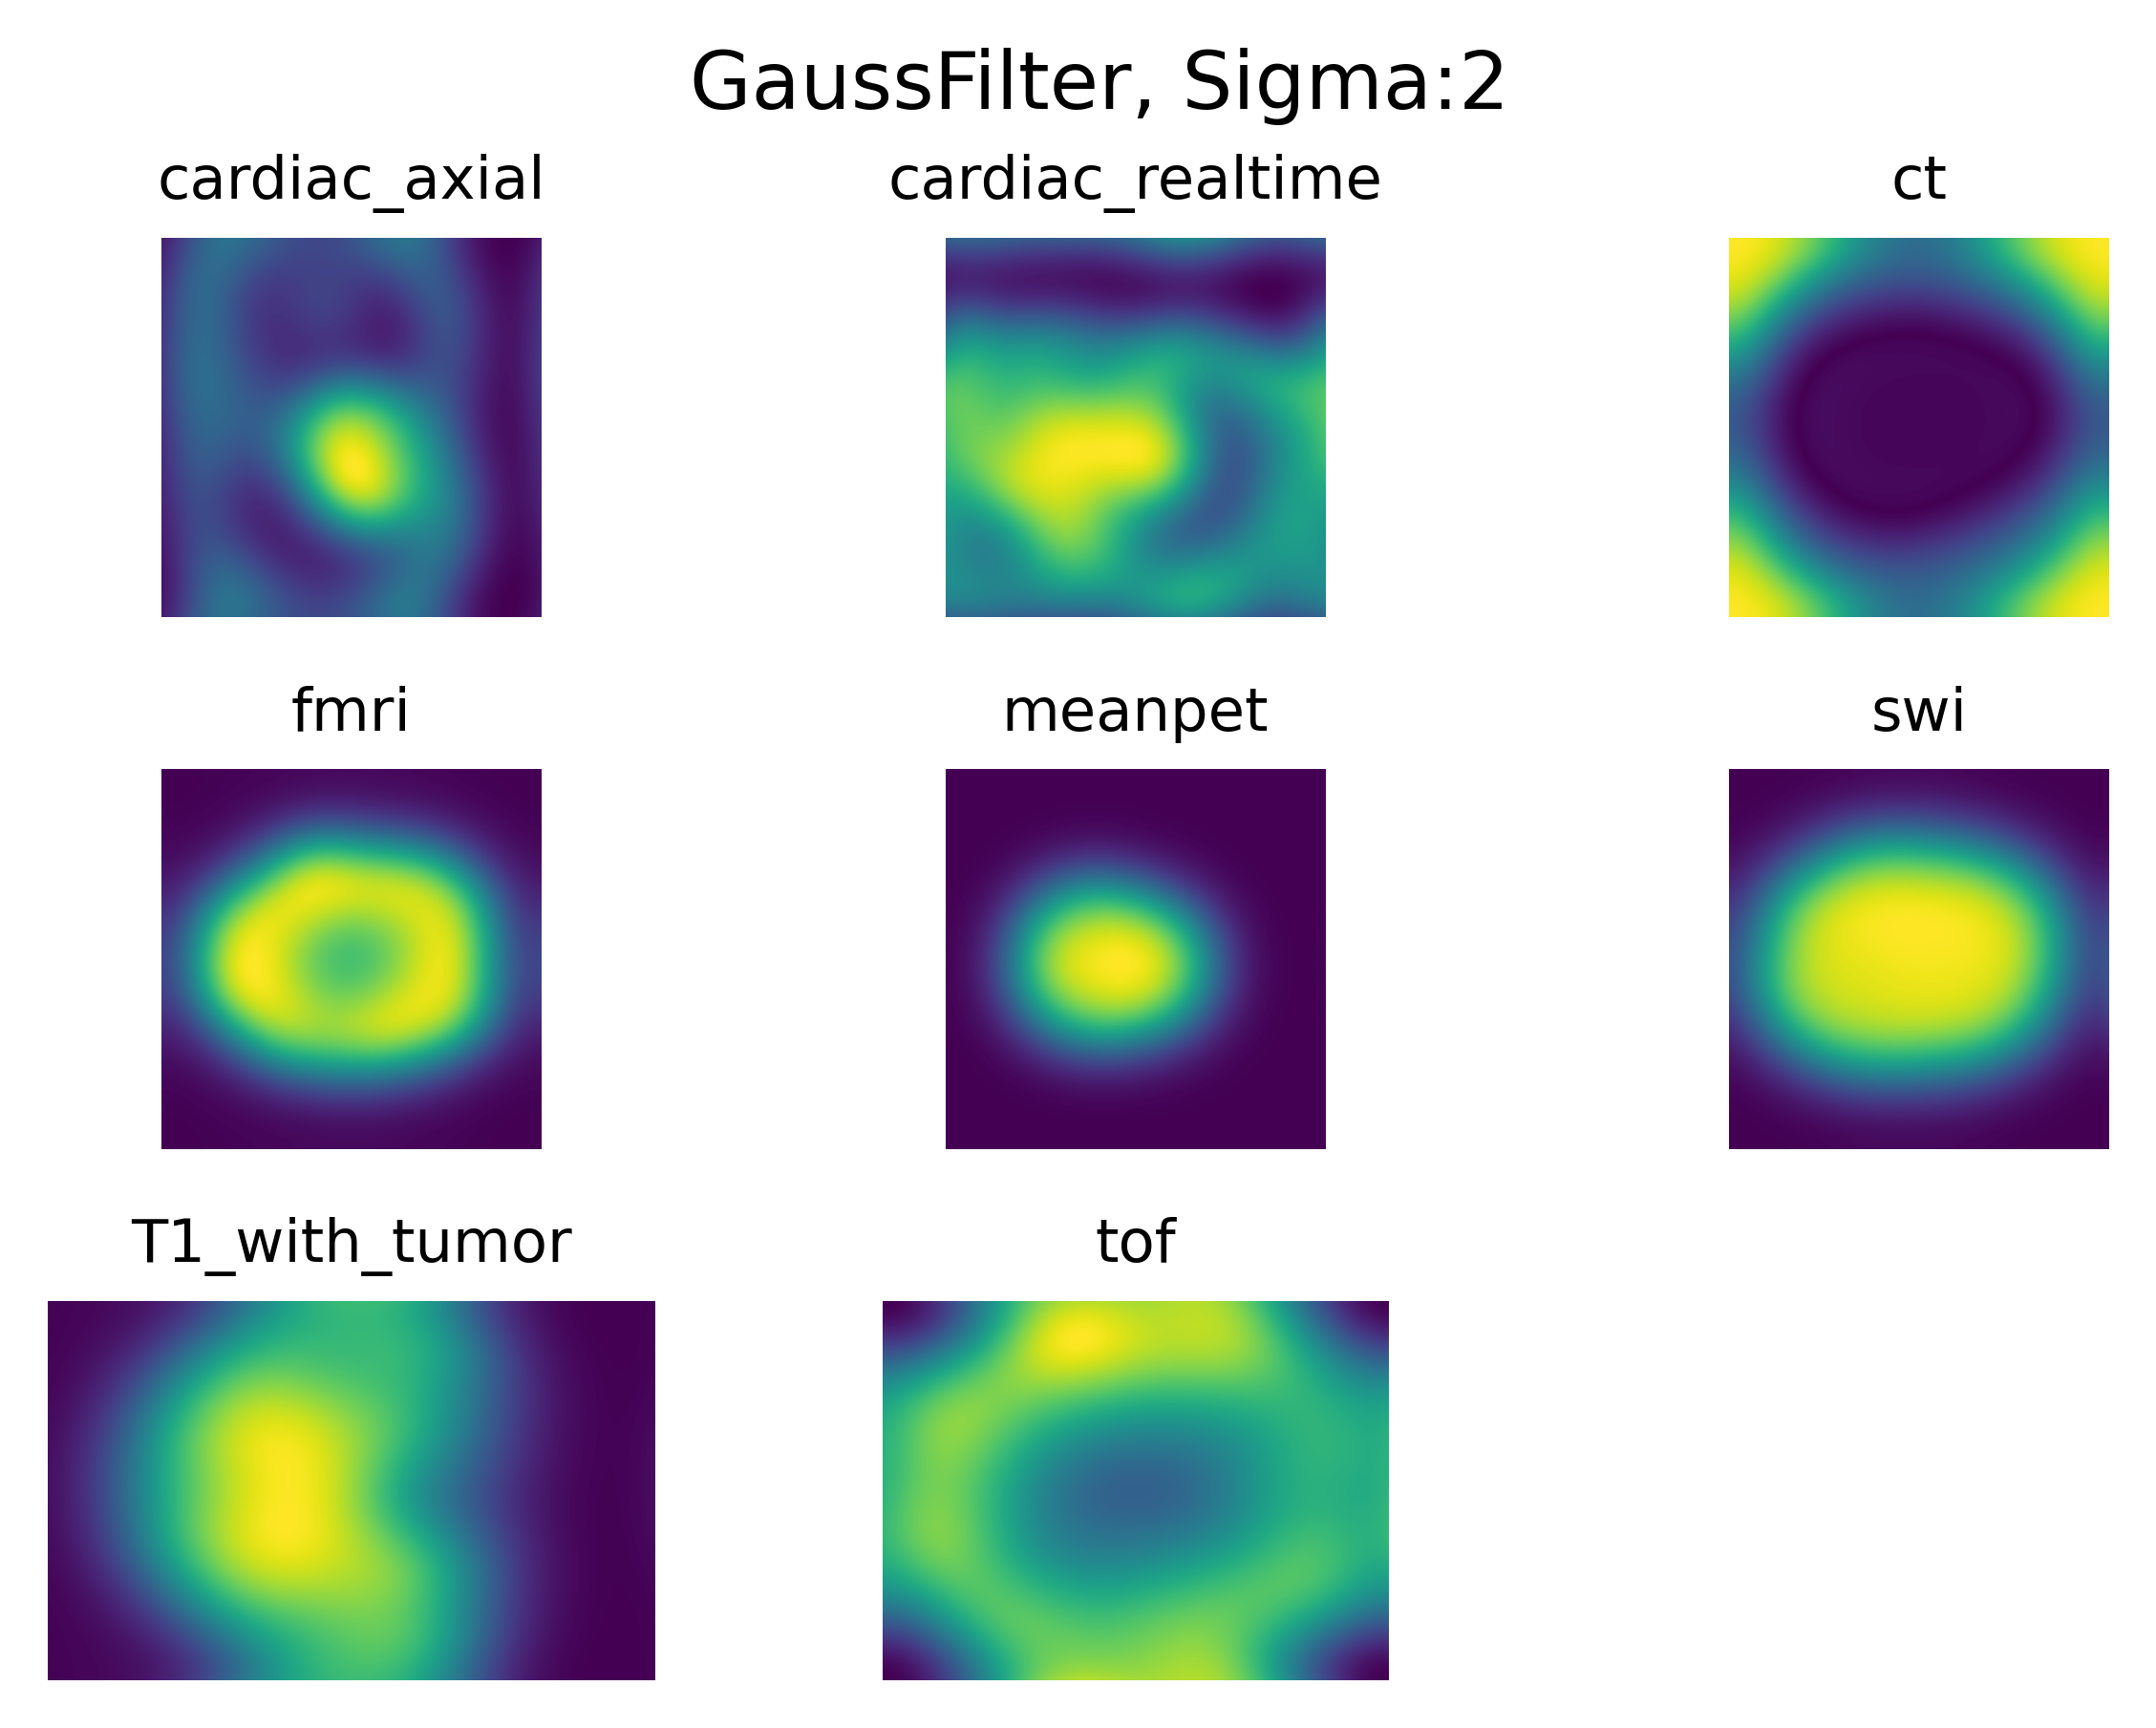

In [22]:
plt.figure()
plotgaussfilter(imglist,imgtitle,sigma=2)

In [23]:
plt.figure()
plotgaussfilter(imglist,imgtitle,sigma=4)

<Figure size 432x288 with 0 Axes>

In [24]:
plt.figure()
plotgaussfilter(imglist,imgtitle,sigma=6)

<Figure size 432x288 with 0 Axes>

Note：As showned on figures above, when sigma becomes larger, the image is less blurer.